# Data sample analysis: unsupervised learning

## Problem: Retail customer segmantation

## Description
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Segmentation Task
The task is to perform customer segmentaion 

## Sample analysis plan
1. Data scheme review
2. Variables analysis
3. Corellation analysis
4. Data clustering
5. Clustering result visualization

## Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile

In [3]:
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [4]:
%matplotlib inline

## Data scheme review

In [5]:
with zipfile.ZipFile('transactions.csv.zip') as zf:
    data = pd.read_csv(zf.open('transactions.csv'), parse_dates=['InvoiceDate'])

In [6]:
data.shape

(392857, 11)

**Data preview**

In [7]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0,15.30,3
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0,25.50,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,4
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,0,54.08,2


In [8]:
data[data.categ_product == 4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,4
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,4
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,0,12.60,4
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,0,12.60,4
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047,United Kingdom,0,19.90,4
...,...,...,...,...,...,...,...,...,...,...,...
392811,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581,United Kingdom,0,12.48,4
392814,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777,United Kingdom,0,66.60,4
392816,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09 12:25:00,1.85,13777,United Kingdom,0,88.80,4
392822,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,2.08,15804,United Kingdom,0,24.96,4


**Some descriptive statistic for numeric variables**

In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID,QuantityCanceled,TotalPrice,categ_product
count,392857.000000,392857.000000,392857.000000,392857.000000,392857.000000,392857.000000
mean,13.143587,3.139151,15287.588204,0.624314,21.341374,2.053531
std,181.564772,22.466373,1713.458613,175.527084,71.019589,1.358672
min,-720.000000,0.000000,12346.000000,0.000000,-4161.060000,0.000000
25%,2.000000,1.250000,13955.000000,0.000000,4.680000,1.000000
50%,6.000000,1.950000,15150.000000,0.000000,11.800000,2.000000
75%,12.000000,3.750000,16791.000000,0.000000,19.800000,3.000000
max,80995.000000,8142.750000,18287.000000,80995.000000,8142.750000,4.000000


In [10]:
data[data.Quantity < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,0,-27.50,4
6500,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom,0,-29.29,4
9844,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom,0,-281.00,4
12250,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340,United Kingdom,0,-267.12,4
19816,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom,0,-5.76,4
...,...,...,...,...,...,...,...,...,...,...,...
375867,C579908,D,Discount,-1,2011-12-01 08:49:00,28.68,14527,United Kingdom,0,-28.68,4
376133,C579948,21098,CHRISTMAS TOILET ROLL,-3,2011-12-01 10:56:00,1.25,16376,United Kingdom,0,-3.75,2
378630,C580263,M,Manual,-4,2011-12-02 12:43:00,9.95,12536,France,0,-39.80,4
378631,C580263,M,Manual,-16,2011-12-02 12:43:00,0.29,12536,France,0,-4.64,4


**Some descriptive statistic for categorical variable**

In [11]:
data.describe(include = [np.object])

,InvoiceNo,StockCode,Description,Country
count,392857,392857,392857,392857
unique,18632,3666,3878,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2023,2016,349347


**Missing values**

In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
QuantityCanceled    0
TotalPrice          0
categ_product       0
dtype: int64

**Pair plot for expert selected numeric variables**

In [13]:
?sns.pairplot

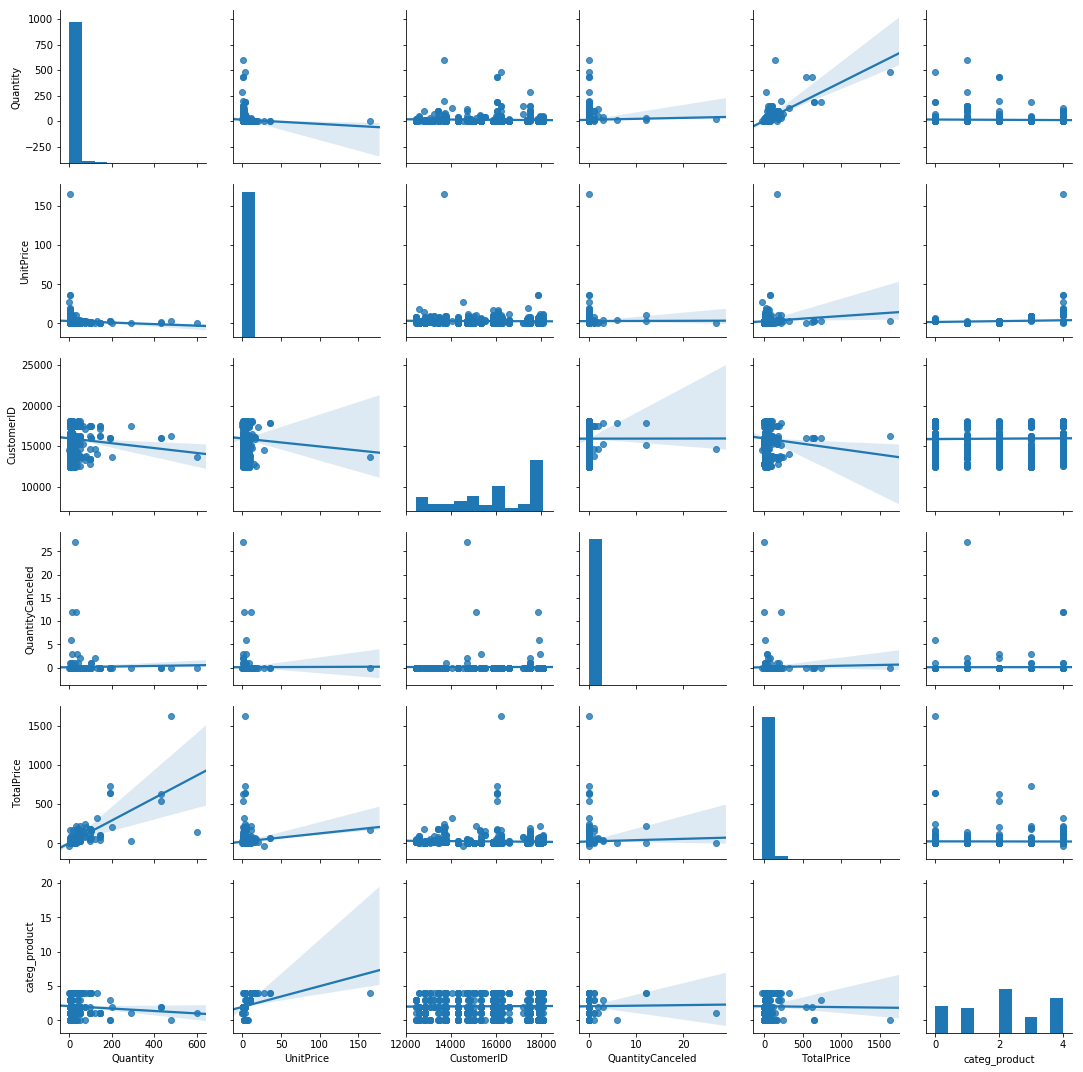

In [14]:
sns.pairplot(data.head(1000), size = 2.5, kind = 'reg')
plt.show()

**Bar plot for categorical features**

In [15]:
categorical_variables = data.select_dtypes(include = ['object']).columns

In [16]:
data[categorical_variables].nunique()

InvoiceNo      18632
StockCode       3666
Description     3878
Country           37
dtype: int64

In [17]:
data.Country.value_counts()

United Kingdom          349347
Germany                   9027
France                    8329
EIRE                      7229
Spain                     2480
Netherlands               2364
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      759
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [18]:
data.Country.value_counts().nlargest(10)

United Kingdom    349347
Germany             9027
France              8329
EIRE                7229
Spain               2480
Netherlands         2364
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: Country, dtype: int64

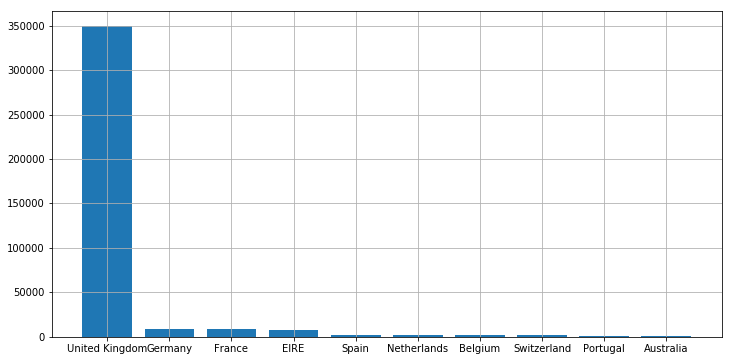

In [19]:
plt.figure(figsize = (12,6))
plt.grid(True)
plt.bar(x = data.Country.value_counts().nlargest(10).index, 
        height = data.Country.value_counts().nlargest(10).values)
plt.show()

### Correlation analysis

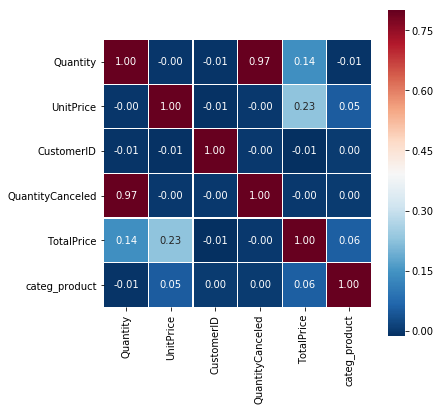

In [20]:
correlation_matrix = data.corr()

plt.figure(figsize = (6, 6))
sns.heatmap(correlation_matrix, vmax = 0.8, cmap = 'RdBu_r', annot = True, fmt = '.2f', square = True,
            annot_kws = {'size':10}, linecolor = 'white', linewidths = 0.1)

## Data clustering

In [21]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0,15.30,3
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0,25.50,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,4
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,0,54.08,2


### How much money did customers spend for each product?

In [22]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = data[data['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x : x if x > 0 else 0)
    data.loc[:, col] = price_temp
    data[col].fillna(0, inplace = True)

In [23]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4'],
      dtype='object')

In [24]:
data[['CustomerID','InvoiceNo', 'Description', 'UnitPrice', 'Quantity', 'categ_product', 
      'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4', 'TotalPrice']].head(10)

,CustomerID,InvoiceNo,Description,UnitPrice,Quantity,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4,TotalPrice
0,17850,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6,4,0.00,0.0,0.00,0.0,15.3,15.30
1,17850,536365,WHITE METAL LANTERN,3.39,6,0,20.34,0.0,0.00,0.0,0.0,20.34
2,17850,536365,CREAM CUPID HEARTS COAT HANGER,2.75,8,0,22.00,0.0,0.00,0.0,0.0,22.00
3,17850,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,6,0,20.34,0.0,0.00,0.0,0.0,20.34
4,17850,536365,RED WOOLLY HOTTIE WHITE HEART.,3.39,6,0,20.34,0.0,0.00,0.0,0.0,20.34
5,17850,536365,SET 7 BABUSHKA NESTING BOXES,7.65,2,3,0.00,0.0,0.00,15.3,0.0,15.30
6,17850,536365,GLASS STAR FROSTED T-LIGHT HOLDER,4.25,6,0,25.50,0.0,0.00,0.0,0.0,25.50
7,17850,536366,HAND WARMER UNION JACK,1.85,6,4,0.00,0.0,0.00,0.0,11.1,11.10
8,17850,536366,HAND WARMER RED POLKA DOT,1.85,6,2,0.00,0.0,11.10,0.0,0.0,11.10
9,13047,536367,ASSORTED COLOUR BIRD ORNAMENT,1.69,32,2,0.00,0.0,54.08,0.0,0.0,54.08


### Group orders (amount of money, spent for categories) for a customer

In [25]:
basket_price = data.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])[['categ_{}'.format(i) for i in range(5)]].sum()
basket_price.head()

categ_0  categ_1  categ_2  categ_3  \
CustomerID InvoiceNo InvoiceDate                                               
12346      541431    2011-01-18 10:01:00     0.00     0.00      0.0     0.00   
12347      537626    2010-12-07 14:57:00   293.35    23.40    187.2   124.44   
           542237    2011-01-26 14:30:00   169.20    84.34    130.5     0.00   
           549222    2011-04-07 10:43:00   115.00    81.00    330.9     0.00   
           556201    2011-06-09 13:01:00   168.76    41.40     74.4    19.90   

                                          categ_4  
CustomerID InvoiceNo InvoiceDate                   
12346      541431    2011-01-18 10:01:00     0.00  
12347      537626    2010-12-07 14:57:00    83.40  
           542237    2011-01-26 14:30:00    91.35  
           549222    2011-04-07 10:43:00   109.35  
           556201    2011-06-09 13:01:00    78.06

In [26]:
#Calculate total amount of spent money
basket_price['Basket Price'] = basket_price.sum(1) # sum by rows
basket_price.head()

categ_0  categ_1  categ_2  categ_3  \
CustomerID InvoiceNo InvoiceDate                                               
12346      541431    2011-01-18 10:01:00     0.00     0.00      0.0     0.00   
12347      537626    2010-12-07 14:57:00   293.35    23.40    187.2   124.44   
           542237    2011-01-26 14:30:00   169.20    84.34    130.5     0.00   
           549222    2011-04-07 10:43:00   115.00    81.00    330.9     0.00   
           556201    2011-06-09 13:01:00   168.76    41.40     74.4    19.90   

                                          categ_4  Basket Price  
CustomerID InvoiceNo InvoiceDate                                 
12346      541431    2011-01-18 10:01:00     0.00          0.00  
12347      537626    2010-12-07 14:57:00    83.40        711.79  
           542237    2011-01-26 14:30:00    91.35        475.39  
           549222    2011-04-07 10:43:00   109.35        636.25  
           556201    2011-06-09 13:01:00    78.06        382.52

In [27]:
basket_price.reset_index(inplace = True)
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True).head(10)

,CustomerID,InvoiceNo,InvoiceDate,categ_0,categ_1,categ_2,categ_3,categ_4,Basket Price
1,12347,537626,2010-12-07 14:57:00,293.35,23.40,187.2,124.44,83.40,711.79
2,12347,542237,2011-01-26 14:30:00,169.20,84.34,130.5,0.00,91.35,475.39
3,12347,549222,2011-04-07 10:43:00,115.00,81.00,330.9,0.00,109.35,636.25
4,12347,556201,2011-06-09 13:01:00,168.76,41.40,74.4,19.90,78.06,382.52
5,12347,562032,2011-08-02 08:48:00,158.16,61.30,109.7,97.80,157.95,584.91
6,12347,573511,2011-10-31 12:25:00,368.72,154.30,203.3,55.60,512.40,1294.32
7,12347,581180,2011-12-07 15:52:00,0.00,38.58,100.8,30.00,55.44,224.82
8,12348,539318,2010-12-16 19:09:00,0.00,478.80,174.0,0.00,240.00,892.80
9,12348,541998,2011-01-25 10:42:00,0.00,187.44,0.0,0.00,40.00,227.44
10,12348,548955,2011-04-05 10:47:00,0.00,17.00,310.0,0.00,40.00,367.00


### Group the statistics calculated over basket price for each customer 
We add features that describe the customer, such as: the number of purchases made by the customer, the minimum / maximum / average purchase price

In [28]:
transactions_per_user = basket_price.groupby(by = ['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
#basket_price.groupby(by = ['CustomerID'])['categ_0'].sum()

In [29]:
transactions_per_user.sort_values('CustomerID', ascending = True).head(10)

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,11.237123,26.375870,7.604176,25.242459
1,12348,4,227.44,892.80,449.310000,1797.24,0.000000,38.016069,41.953217,0.000000,20.030714
2,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,4.513101,26.506216,20.389178,37.877728
3,12350,1,334.40,334.40,334.400000,334.40,0.000000,11.692584,48.444976,0.000000,39.862440
4,12352,7,144.35,840.30,340.815714,2385.71,14.601523,1.299404,15.705178,14.691643,53.702252
5,12353,1,89.00,89.00,89.000000,89.00,0.000000,0.000000,13.033708,22.359551,64.606742
6,12354,1,1079.40,1079.40,1079.400000,1079.40,19.700760,14.950899,31.176580,16.235872,17.935890
7,12355,1,459.40,459.40,459.400000,459.40,25.272094,0.000000,53.286896,0.000000,21.441010
8,12356,3,58.35,2271.62,937.143333,2811.43,7.256094,14.147605,28.062232,13.184749,37.349320
9,12357,1,6207.67,6207.67,6207.670000,6207.67,28.350089,5.089832,18.475531,25.189000,22.895547


We also add the following features: the number of days elapsed from the first and last purchases

In [30]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by = ['CustomerID'])['InvoiceDate'].min())
last_purchase = pd.DataFrame(basket_price.groupby(by =['CustomerID'])['InvoiceDate'].max())

days_since_first_registration = first_registration.applymap(lambda x:(last_date - x.date()).days)
days_since_last_purchase = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = days_since_last_purchase.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = days_since_first_registration.reset_index(drop = False)['InvoiceDate']

In [31]:
transactions_per_user.head(10)

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,11.237123,26.375870,7.604176,25.242459,2,367
1,12348,4,227.44,892.80,449.310000,1797.24,0.000000,38.016069,41.953217,0.000000,20.030714,75,358
2,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,4.513101,26.506216,20.389178,37.877728,18,18
3,12350,1,334.40,334.40,334.400000,334.40,0.000000,11.692584,48.444976,0.000000,39.862440,310,310
4,12352,7,144.35,840.30,340.815714,2385.71,14.601523,1.299404,15.705178,14.691643,53.702252,36,296
5,12353,1,89.00,89.00,89.000000,89.00,0.000000,0.000000,13.033708,22.359551,64.606742,204,204
6,12354,1,1079.40,1079.40,1079.400000,1079.40,19.700760,14.950899,31.176580,16.235872,17.935890,232,232
7,12355,1,459.40,459.40,459.400000,459.40,25.272094,0.000000,53.286896,0.000000,21.441010,214,214
8,12356,3,58.35,2271.62,937.143333,2811.43,7.256094,14.147605,28.062232,13.184749,37.349320,22,325
9,12357,1,6207.67,6207.67,6207.670000,6207.67,28.350089,5.089832,18.475531,25.189000,22.895547,33,33


We may be particularly interested in customers who have made only one purchase. Let's see how many of them:

In [32]:
(transactions_per_user['count'] == 1).mean()

0.34365611278021724

## Data clustering

In [33]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4',
            'LastPurchase', 'FirstPurchase']

matrix = transactions_per_user[list_cols].values

In [34]:
matrix.shape

(4327, 11)

**Features normalization**

In [35]:
scaler = StandardScaler()
scaler.fit(matrix)
scaled_matrix = scaler.transform(matrix)

In [36]:
#other option: use scaler.fit_transform

**Plot explaoned variance by components**

In [37]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

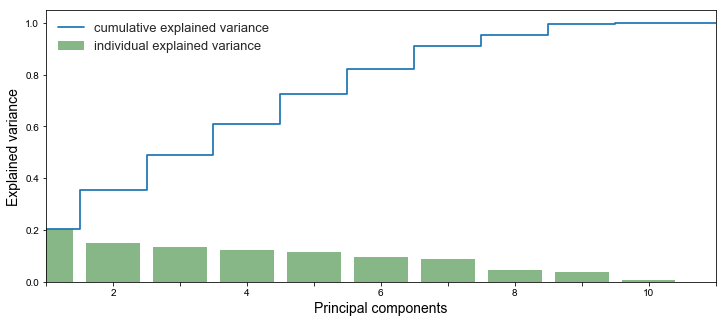

In [38]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid',
         label = 'cumulative explained variance')
sns.barplot(np.arange(1, matrix.shape[1] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

### Kmeans clustering

In [39]:
n_clusters = 6
kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 200, max_iter = 600)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)

Cluster sizes

In [40]:
pd.Series(clusters_clients).value_counts()

2    1415
0    1154
1     833
3     826
4      73
5      26
dtype: int64

## How to plot clusters?

### PCA main components

In [41]:
pca = PCA(n_components = 2)
mat = pca.fit_transform(scaled_matrix)

### Kmeans clustering

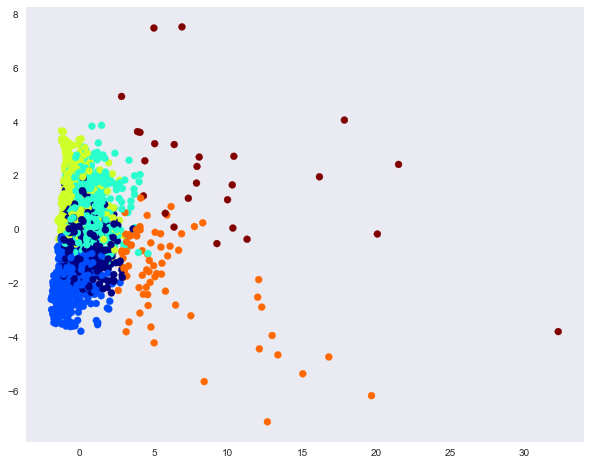

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(mat[:,0], mat[:,1], c = clusters_clients, alpha = 1);
plt.set_cmap('jet')
plt.grid()

### t-SNE clustering

In [43]:
%%time
from sklearn.manifold import TSNE
mat = TSNE().fit_transform(scaled_matrix)

CPU times: user 1min 34s, sys: 6.84 s, total: 1min 41s
Wall time: 1min 42s


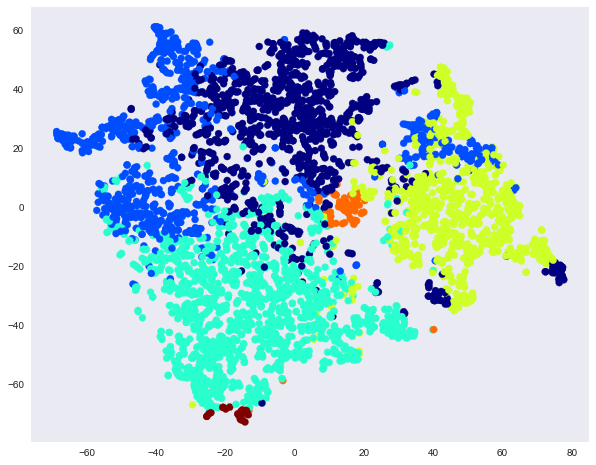

In [44]:
plt.figure(figsize = (10,8))
plt.scatter(mat[:,0], mat[:,1], c = clusters_clients, alpha = 1);
plt.set_cmap('jet')
plt.grid()

### Clusters representation

In [45]:
selected_customers = transactions_per_user.copy()
selected_customers.loc[:, 'cluster'] = clusters_clients

In [46]:
selected_customers.head(10)

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,11.237123,26.375870,7.604176,25.242459,2,367,2
1,12348,4,227.44,892.80,449.310000,1797.24,0.000000,38.016069,41.953217,0.000000,20.030714,75,358,1
2,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,4.513101,26.506216,20.389178,37.877728,18,18,4
3,12350,1,334.40,334.40,334.400000,334.40,0.000000,11.692584,48.444976,0.000000,39.862440,310,310,3
4,12352,7,144.35,840.30,340.815714,2385.71,14.601523,1.299404,15.705178,14.691643,53.702252,36,296,2
5,12353,1,89.00,89.00,89.000000,89.00,0.000000,0.000000,13.033708,22.359551,64.606742,204,204,3
6,12354,1,1079.40,1079.40,1079.400000,1079.40,19.700760,14.950899,31.176580,16.235872,17.935890,232,232,3
7,12355,1,459.40,459.40,459.400000,459.40,25.272094,0.000000,53.286896,0.000000,21.441010,214,214,1
8,12356,3,58.35,2271.62,937.143333,2811.43,7.256094,14.147605,28.062232,13.184749,37.349320,22,325,2
9,12357,1,6207.67,6207.67,6207.670000,6207.67,28.350089,5.089832,18.475531,25.189000,22.895547,33,33,4


In [47]:
merged_df = selected_customers.groupby('cluster').mean()
del merged_df['CustomerID']

In [48]:
merged_df

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
cluster,,,,,,,,,,,,
0,2.030329,267.634334,424.654758,339.636085,697.372315,23.304560,11.079675,20.539946,14.747276,30.328544,45.508666,85.513865
1,2.528211,210.265318,358.346627,277.935579,721.300902,7.672849,28.861379,43.011768,5.236532,15.217473,100.487395,190.882353
2,7.821201,150.603139,689.772770,370.818410,3029.921259,17.886219,11.233914,23.439338,15.554146,31.886383,32.832509,316.008481
3,1.710654,244.625642,327.046949,283.162599,478.539298,15.811878,8.711915,17.664079,23.278583,34.533545,251.202179,287.950363
4,1.726027,1890.326712,2474.827685,2156.348676,3861.566041,18.404359,11.141932,22.767640,13.334468,34.351601,112.465753,181.876712
5,52.846154,187.900000,11102.694615,2668.711017,77928.067692,16.727861,9.507029,21.024223,16.036924,36.703963,25.153846,345.384615


## Clustering result visualization

In [49]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid(False)
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)


This allows to have a global view of the content of each cluster:

In [50]:
#transactions_per_user.LastPurchase.min()

In [51]:
merged_df.head()

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
cluster,,,,,,,,,,,,
0,2.030329,267.634334,424.654758,339.636085,697.372315,23.304560,11.079675,20.539946,14.747276,30.328544,45.508666,85.513865
1,2.528211,210.265318,358.346627,277.935579,721.300902,7.672849,28.861379,43.011768,5.236532,15.217473,100.487395,190.882353
2,7.821201,150.603139,689.772770,370.818410,3029.921259,17.886219,11.233914,23.439338,15.554146,31.886383,32.832509,316.008481
3,1.710654,244.625642,327.046949,283.162599,478.539298,15.811878,8.711915,17.664079,23.278583,34.533545,251.202179,287.950363
4,1.726027,1890.326712,2474.827685,2156.348676,3861.566041,18.404359,11.141932,22.767640,13.334468,34.351601,112.465753,181.876712


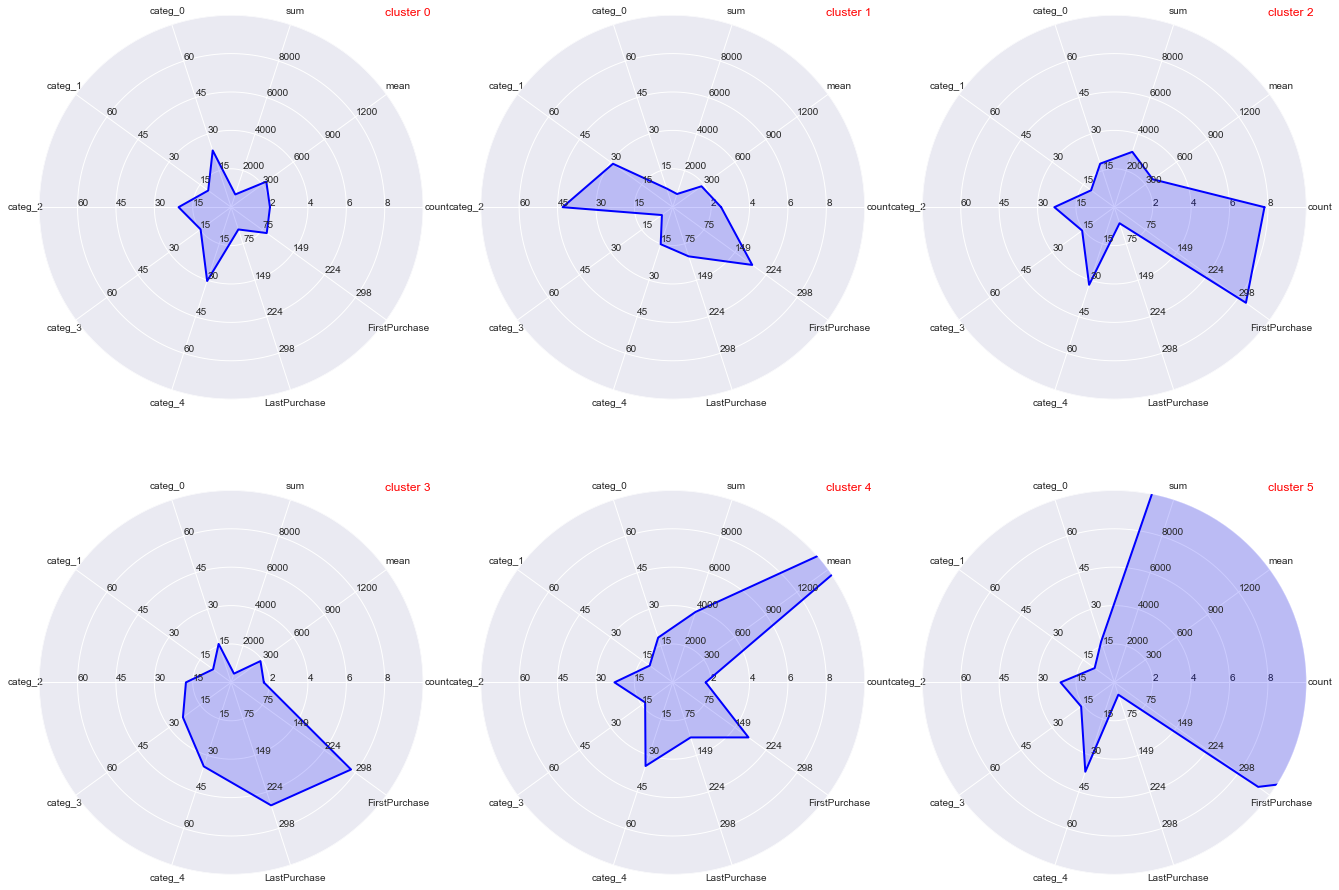

In [52]:
fig = plt.figure(figsize=(16,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4',
             'LastPurchase', 'FirstPurchase']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75],
         [0, 373], [0, 373]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1./i_cols), (1./i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = u'cluster {}'.format(index[ind]), color = 'r')
    ind += 1 

#### Домашнее задание <span style="color:red">(опционально)</span> 
Попробуйте улучшить результаты кластеризации!
Например, можно поэкспериментировать с такими параметрами решения, как:
- количество кластеров
- метод кластеризации
- генерация признаков, которые потом используются для кластеризации
- визуализация и интерпретация результатов

Для проверки задания, как обычно, пришлите ссылку на блокнот (jupyter notebook) с решением в репозитории 